In [97]:
import pandas as pd
import os
import random


In [154]:
data_dir = '/opt/ml/level2_dkt_recsys-level2-recsys-10-2/data' # 경로는 상황에 맞춰서 수정해주세요!
csv_file_path = os.path.join(data_dir, 'train_data.csv') # 데이터는 대회홈페이지에서 받아주세요 :)
df = pd.read_csv(csv_file_path)

In [103]:
test= os.path.join(data_dir, 'test_data.csv')
test = pd.read_csv(test)

In [112]:
test

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623
...,...,...,...,...,...,...
260109,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
260110,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
260111,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244
260112,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244


In [113]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [44]:
#유저별 시퀀스를 고려하기 위해 아래와 같이 정렬
df.sort_values(by=['userID','Timestamp'], inplace=True)


In [46]:

#유저들의 문제 풀이수, 정답 수, 정답률을 시간순으로 누적해서 계산
df['user_correct_answer'] = df.groupby('userID')['answerCode'].transform(lambda x: x.cumsum().shift(1))
df['user_total_answer'] = df.groupby('userID')['answerCode'].cumcount()
df['user_acc'] = df['user_correct_answer']/df['user_total_answer']


In [47]:

# testId와 KnowledgeTag의 전체 정답률은 한번에 계산
# 아래 데이터는 제출용 데이터셋에 대해서도 재사용
correct_t = df.groupby(['testId'])['answerCode'].agg(['mean', 'sum'])
correct_t.columns = ["test_mean", 'test_sum']
correct_k = df.groupby(['KnowledgeTag'])['answerCode'].agg(['mean', 'sum'])
correct_k.columns = ["tag_mean", 'tag_sum']


In [48]:
df = pd.merge(df, correct_t, on=['testId'], how="left")
df = pd.merge(df, correct_k, on=['KnowledgeTag'], how="left")

In [21]:
#ass_aver = df.groupby('assessmentItemID')['answerCode'].mean() * 100

In [72]:
#문항별 평균 평점
ass_aver = df.groupby(['assessmentItemID'])['answerCode'].agg(['mean'])
#유저별 평균 평점
user_aver = df.groupby(['userID'])['answerCode'].agg(['mean'])

In [73]:
df = pd.merge(df, ass_aver, on=['assessmentItemID'], how="left")
df = pd.merge(df, user_aver, on=['userID'], how="left")

In [74]:
df = df.rename(columns={'mean_x':'ass_aver'})
df = df.rename(columns={'mean_y':'user_aver'})

In [71]:
df = df.drop(columns = ['ass_aver'])

In [75]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,user_correct_answer,user_total_answer,user_acc,test_mean,test_sum,tag_mean,tag_sum,ass_aver,user_aver
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,NaN,0,NaN,0.947683,1268,0.955022,637,0.982063,0.630872
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1.0,1,1.000000,0.947683,1268,0.913187,3040,0.964126,0.630872
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2.0,2,1.000000,0.947683,1268,0.913187,3040,0.910314,0.630872
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,3.0,3,1.000000,0.947683,1268,0.913187,3040,0.968610,0.630872
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,4.0,4,1.000000,0.947683,1268,0.913187,3040,0.941704,0.630872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1.0,4,0.250000,0.662590,921,0.689706,2814,0.435252,0.555556
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1.0,5,0.200000,0.655109,718,0.697874,2199,0.649635,0.555556
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,2.0,6,0.333333,0.655109,718,0.697874,2199,0.635036,0.555556
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,3.0,7,0.428571,0.655109,718,0.697874,2199,0.791971,0.555556


In [76]:
def x_100(value):
    return int(value * 100)
df['ass_aver'] = df['ass_aver'].apply(x_100)
df['user_aver'] = df['user_aver'].apply(x_100)

In [77]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,user_correct_answer,user_total_answer,user_acc,test_mean,test_sum,tag_mean,tag_sum,ass_aver,user_aver
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,NaN,0,NaN,0.947683,1268,0.955022,637,98,63
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1.0,1,1.000000,0.947683,1268,0.913187,3040,96,63
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2.0,2,1.000000,0.947683,1268,0.913187,3040,91,63
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,3.0,3,1.000000,0.947683,1268,0.913187,3040,96,63
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,4.0,4,1.000000,0.947683,1268,0.913187,3040,94,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1.0,4,0.250000,0.662590,921,0.689706,2814,43,55
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1.0,5,0.200000,0.655109,718,0.697874,2199,64,55
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,2.0,6,0.333333,0.655109,718,0.697874,2199,63,55
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,3.0,7,0.428571,0.655109,718,0.697874,2199,79,55


In [78]:
df['assessment_2'] = df['assessmentItemID'].str[2]  #index2 만 추출
#train_data.groupby('assessment_2')['answerCode'].mean()#.hist()

In [82]:

level = df.groupby(['assessment_2'])['answerCode'].agg(['mean'])

In [83]:
level

,mean
assessment_2,
1,0.800876
2,0.737593
3,0.702238
4,0.684056
5,0.658208
6,0.709232
7,0.521876
8,0.502598
9,0.449948


In [84]:
df = pd.merge(df, level, on=['assessment_2'], how="left")

In [86]:
df = df.drop(columns = ['level'])

In [87]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,user_correct_answer,user_total_answer,user_acc,test_mean,test_sum,tag_mean,tag_sum,ass_aver,user_aver,assessment_2,mean
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,NaN,0,NaN,0.947683,1268,0.955022,637,98,63,6,0.709232
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1.0,1,1.000000,0.947683,1268,0.913187,3040,96,63,6,0.709232
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2.0,2,1.000000,0.947683,1268,0.913187,3040,91,63,6,0.709232
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,3.0,3,1.000000,0.947683,1268,0.913187,3040,96,63,6,0.709232
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,4.0,4,1.000000,0.947683,1268,0.913187,3040,94,63,6,0.709232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1.0,4,0.250000,0.662590,921,0.689706,2814,43,55,3,0.702238
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1.0,5,0.200000,0.655109,718,0.697874,2199,64,55,4,0.684056
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,2.0,6,0.333333,0.655109,718,0.697874,2199,63,55,4,0.684056
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,3.0,7,0.428571,0.655109,718,0.697874,2199,79,55,4,0.684056


In [88]:
def time_zero(value):
    if value < 0:
        return 7
    if value > 3600:
        return 3600
    else:
        return value

In [148]:
df['time'] = df['Timestamp'].str.replace(pat=r'[^A-Za-z0-9]', repl=r'', regex=True)
#df['time'] = df['time'].astype('int')
# df['diff'] = df['time'].shift(-1) - df['time']
# df['diff'] = df['diff'].apply(time_zero)


In [92]:
df['diff'] = df['diff'].fillna(7)

In [93]:
def lucky(value):
    if value < 6:
        return 0
    else:
        return 1

In [95]:
df['luc'] = df['diff'].apply(lucky)

In [96]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,user_correct_answer,user_total_answer,user_acc,test_mean,test_sum,tag_mean,tag_sum,ass_aver,user_aver,assessment_2,mean,time,diff,luc
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,NaN,0,NaN,0.947683,1268,0.955022,637,98,63,6,0.709232,20200324001711,3.0,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1.0,1,1.000000,0.947683,1268,0.913187,3040,96,63,6,0.709232,20200324001714,8.0,1
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2.0,2,1.000000,0.947683,1268,0.913187,3040,91,63,6,0.709232,20200324001722,7.0,1
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,3.0,3,1.000000,0.947683,1268,0.913187,3040,96,63,6,0.709232,20200324001729,7.0,1
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,4.0,4,1.000000,0.947683,1268,0.913187,3040,94,63,6,0.709232,20200324001736,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1.0,4,0.250000,0.662590,921,0.689706,2814,43,55,3,0.702238,20200605065021,3600.0,1
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1.0,5,0.200000,0.655109,718,0.697874,2199,64,55,4,0.684056,20200821010639,11.0,1
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,2.0,6,0.333333,0.655109,718,0.697874,2199,63,55,4,0.684056,20200821010650,86.0,1
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,3.0,7,0.428571,0.655109,718,0.697874,2199,79,55,4,0.684056,20200821010736,113.0,1


In [118]:
tag_aver = df.groupby(['KnowledgeTag'])['answerCode'].agg(['mean'])
df = pd.merge(df, tag_aver, on=['KnowledgeTag'], how="left")
df = df.rename(columns={'mean':'tag_aver'})

In [156]:
data_dir = '/opt/ml/level2_dkt_recsys-level2-recsys-10-2/data' # 경로는 상황에 맞춰서 수정해주세요!
csv_file_path = os.path.join(data_dir, 'train_data.csv') # 데이터는 대회홈페이지에서 받아주세요 :)
df = pd.read_csv(csv_file_path)

In [157]:
#df['time'] = df['Timestamp'].str.replace(pat=r'[^A-Za-z0-9]', repl=r'', regex=True)
#df['time'] = df['time'].astype('int')
df['month'] = df['Timestamp'].str[5:7]
df['month'] = df['month'].astype('int')
month_mean = df.groupby(['month'])['answerCode'].agg(['mean'])
df = pd.merge(df, month_mean, on=['month'], how="left")
df = df.rename(columns={'mean':'month_mean'})

In [170]:
df[['month','month_mean']].mean()

month         7.056449
month_mean    0.654378
dtype: float64

In [162]:
import seaborn as sns

In [171]:
sns.distplot(x='month', y='month_mean', data=df)

TypeError: distplot() got an unexpected keyword argument 'y'

<AxesSubplot: xlabel='month', ylabel='month_mean'>

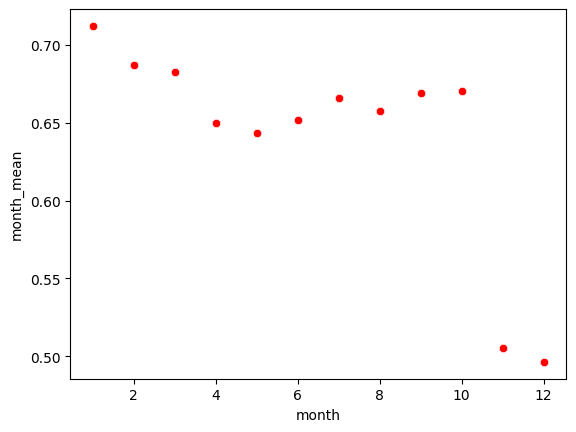

In [163]:
sns.scatterplot(x='month', y='month_mean', color='red', data=df)

In [150]:
df['month']

0          03
1          03
2          03
3          03
4          03
           ..
2266581    06
2266582    08
2266583    08
2266584    08
2266585    08
Name: month, Length: 2266586, dtype: object

In [125]:
month_mean = 

In [125]:
 = df.groupby('ass_num')['answerCode'].agg('mean')
df = pd.merge(df, ass_num, on=['ass_num'], how="left")
df = df.drop(columns = 'ass_num')
df = df.rename(columns = {'mean' : 'ass_num'})

In [136]:
ass_aver = df.groupby(['assessmentItemID'])['answerCode_x'].agg(['mean'])

In [137]:
ass_aver

,mean
assessmentItemID,
A010001001,0.930599
A010001002,0.958991
A010001003,0.905363
A010001004,0.949527
A010001005,0.886435
...,...
A090074002,0.444444
A090074003,0.577778
A090074004,0.333333


In [139]:
ass_num

ass_num
01    0.749916
02    0.720062
03    0.687773
04    0.663364
05    0.599134
06    0.555685
07    0.515399
08    0.457156
09    0.481729
10    0.527892
11    0.480609
12    0.370370
13    0.200743
Name: answerCode, dtype: float64